# Getting Started
## Quick Example

### Install XeroGraph

In [ ]:
pip install XeroGraph

### Imports

In [1]:
# We use XeroAnalyzer application provided in XeroGraph.
# XeroAnalyzer can be imported as XA, xa, xeroanalyzer, xero_analyzer or XeroAnalyzer

from XeroGraph import xa
import pandas as pd

### Use your data

In [ ]:
data = pd.read_csv('df.csv', index_col=0)
print(data.shape)

### Example dataset

In [2]:
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, None, 6, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 1, 6, 4, 5],
    'feature2': [4, 6, 2, 4, 5, 6, 7, 8, 9, 2, 4, 3, 2, 2, 6, 4, 6, 2, 4, 5, 6, 7, 8, 9, 2, 4, 3, 2, 2, 6],
    'feature3': [1, 2, 4, 3, 6, 2, 6, 6, None, 1, 5, 0, 3, 2, 1, 1, 2, 4, 3, None, 2, 6, 6, 1, 1, 5, 0, 3, 2, 1],
    'feature4': [4, 3, 1, 2, 4, 5, 6, 7, 8, 9, 2, None, 3, 2, 1, 4, 3, 1, 2, 4, 5, 6, 7, 8, 9, 2, 1, 3, 2, 1],
    'feature5': [4, 3, 4, 2, None, 6, 2, 4, 5, 6, 7, 8, 9, 2, 4, 4, 3, 4, 2, 1, 6, 2, 4, 5, None, 7, 8, 9, 2, 4]
    
})
print(data.shape)

(30, 5)


### Initialize the XeroGraph analyzer

In [3]:
# Optional arguments:
# To save plot: save_plot=True, save_path='save path'

xg_test = xa(data, save_files=False, save_path="") 

### Perform normality test for each features

In [4]:
xg_test.normality()

feature1 - Statistics=0.958, p-value=0.301
feature1 - Sample looks Gaussian (fail to reject H0)

feature2 - Statistics=0.907, p-value=0.013
feature2 - Sample does not look Gaussian (reject H0)

feature3 - Statistics=0.888, p-value=0.006
feature3 - Sample does not look Gaussian (reject H0)

feature4 - Statistics=0.899, p-value=0.009
feature4 - Sample does not look Gaussian (reject H0)

feature5 - Statistics=0.926, p-value=0.048
feature5 - Sample does not look Gaussian (reject H0)



### Perform Kolmogorov-Smirnov test for each features

In [5]:
xg_test.ks()

feature1: Statistics=0.130, p=0.664
feature1: Sample looks Gaussian (fail to reject H0)
feature2: Statistics=0.150, p=0.466
feature2: Sample looks Gaussian (fail to reject H0)
feature3: Statistics=0.196, p=0.202
feature3: Sample looks Gaussian (fail to reject H0)
feature4: Statistics=0.164, p=0.372
feature4: Sample looks Gaussian (fail to reject H0)
feature5: Statistics=0.200, p=0.186
feature5: Sample looks Gaussian (fail to reject H0)


### Visualize histograms for each features

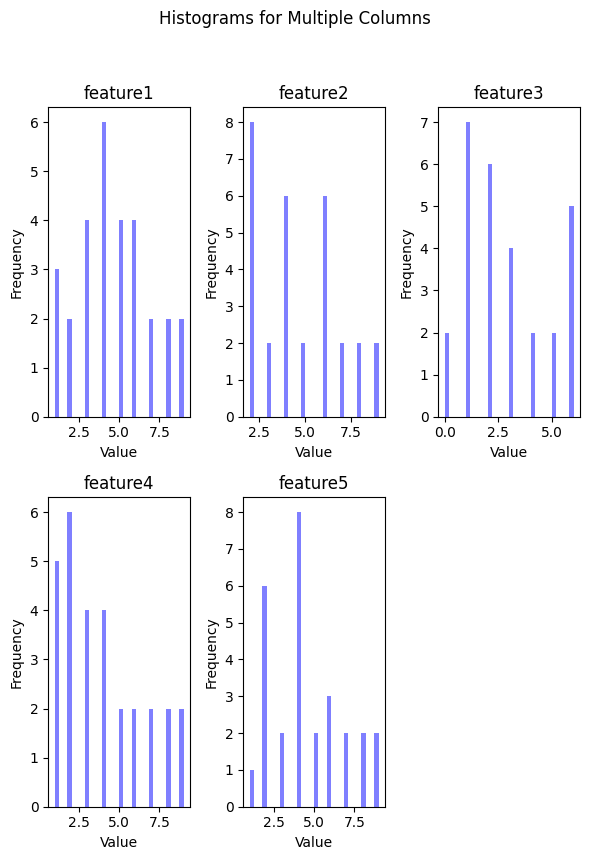

In [6]:
xg_test.histograms()

### Visualize density plots for each features

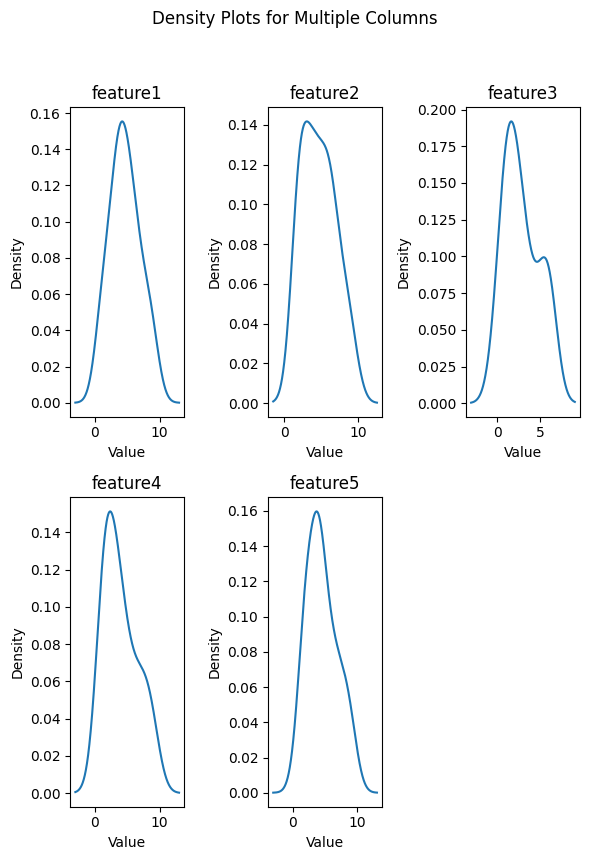

In [7]:
xg_test.density_plots()

### Visualize box plots for each features

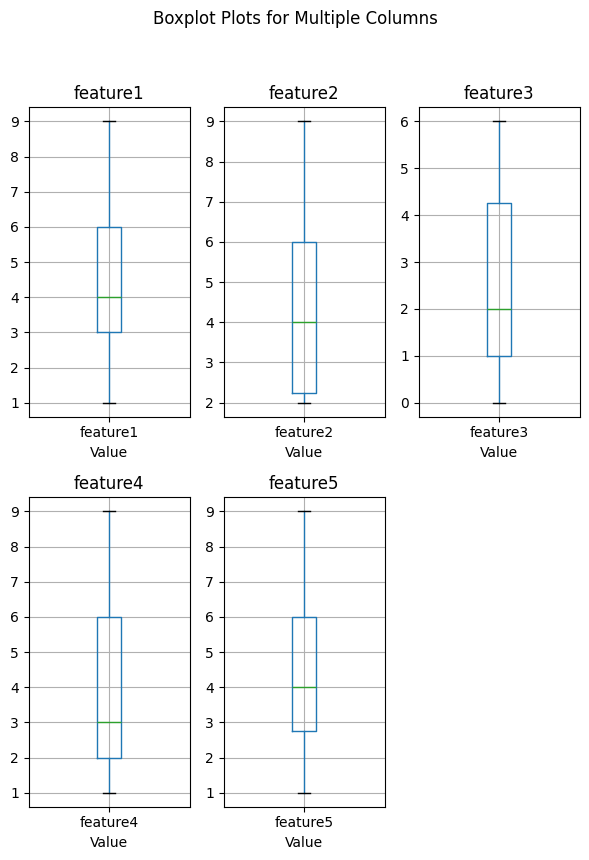

In [8]:
xg_test.box_plots()

### Visualize Q-Q plots for each features

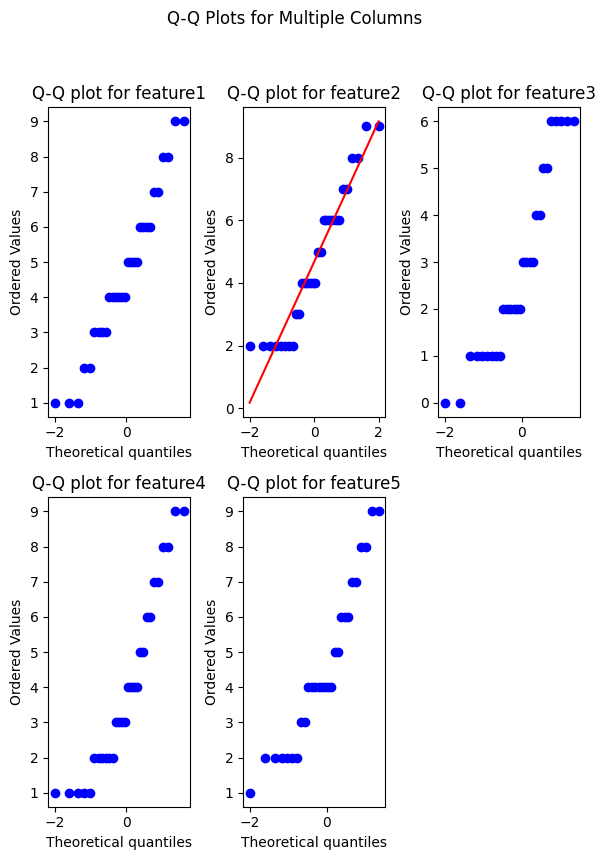

In [9]:
xg_test.qq_plots()

### Visualize missing data patterns

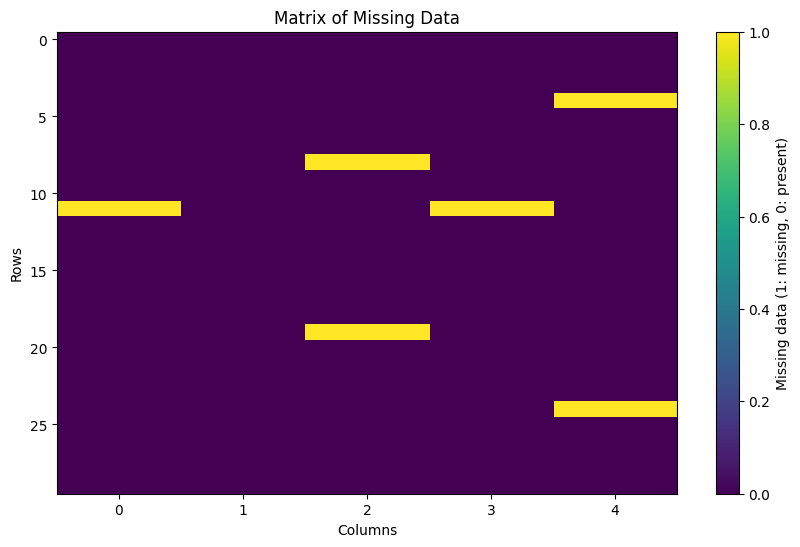

In [10]:
xg_test.missing_data()

### Visualize missing percentages for both features and samples

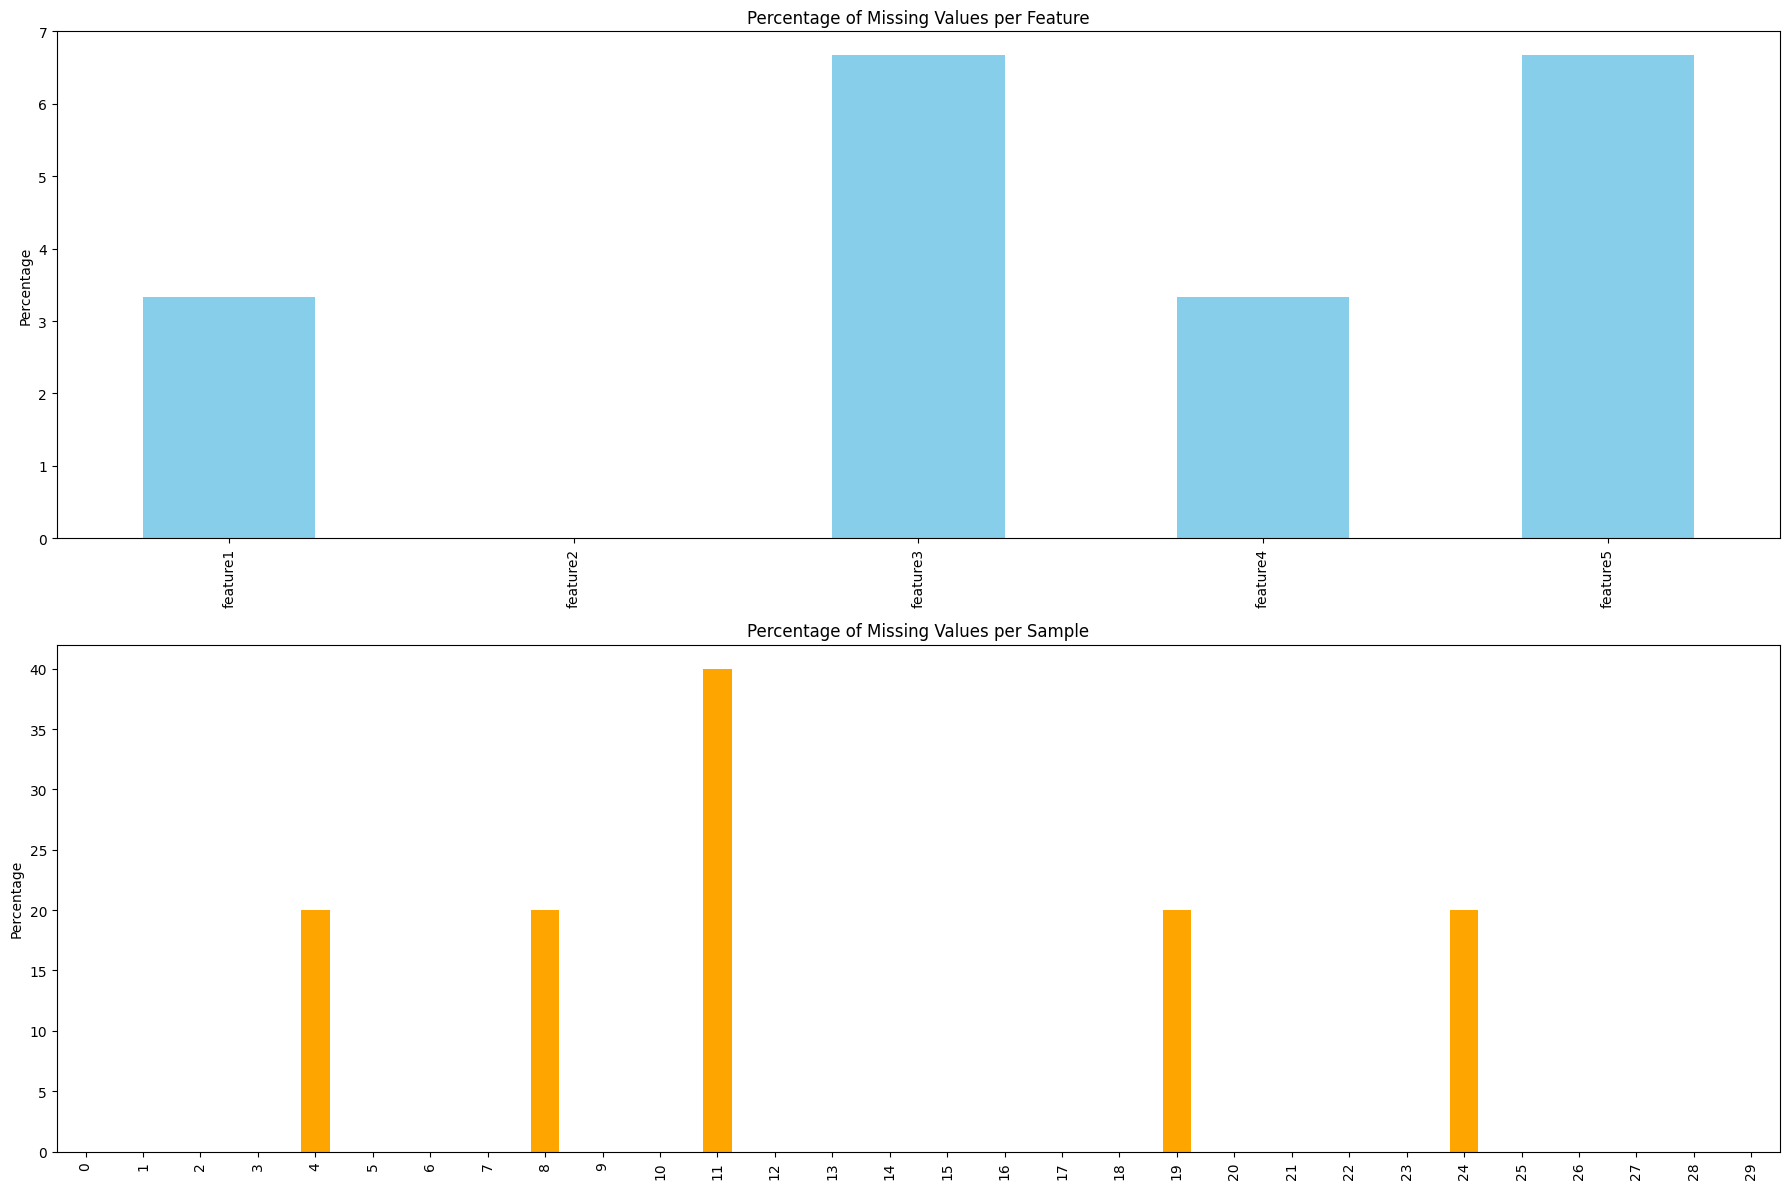

In [11]:
xg_test.missing_percentage()

### Perform Little's MCAR test

In [12]:
mcar_result = xg_test.mcar()
print(f"MCAR Test Result: {mcar_result}")

The data is not Missing Completely at Random (MCAR).
MCAR Test Result: {'chi_square_stat': 32.556550375996615, 'df': 3, 'p_value': 3.9945454783716027e-07}


# Imputation continuous data

### Mean Imputation

In [13]:
imp_data_mean = xg_test.mean_imputation()
print(imp_data_mean.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0  4.000000
1       2.0       6.0       2.0       3.0  3.000000
2       3.0       2.0       4.0       1.0  4.000000
3       4.0       4.0       3.0       2.0  2.000000
4       5.0       5.0       6.0       4.0  4.535714


### Median Imputation

In [14]:
imp_data_median = xg_test.median_imputation()
print(imp_data_median.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0       4.0
1       2.0       6.0       2.0       3.0       3.0
2       3.0       2.0       4.0       1.0       4.0
3       4.0       4.0       3.0       2.0       2.0
4       5.0       5.0       6.0       4.0       4.0


### Most Frequent

In [15]:
imp_data_most_frequent = xg_test.most_frequent_imputation()
print(imp_data_most_frequent.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0       4.0
1       2.0       6.0       2.0       3.0       3.0
2       3.0       2.0       4.0       1.0       4.0
3       4.0       4.0       3.0       2.0       2.0
4       5.0       5.0       6.0       4.0       4.0


### KNN imputation

In [16]:
imp_data_knn = xg_test.knn_imputation()
print(imp_data_knn.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0       4.0
1       2.0       6.0       2.0       3.0       3.0
2       3.0       2.0       4.0       1.0       4.0
3       4.0       4.0       3.0       2.0       2.0
4       5.0       5.0       6.0       4.0       3.8


### Iterative Imputation

In [17]:
imp_data_ii = xg_test.iterative_imputation(plot_convergence=False) # Optional: plot_convergence=True
print(imp_data_ii.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0  4.000000
1       2.0       6.0       2.0       3.0  3.000000
2       3.0       2.0       4.0       1.0  4.000000
3       4.0       4.0       3.0       2.0  2.000000
4       5.0       5.0       6.0       4.0  4.530389


### Imputation by Random Forest

In [18]:
imp_data_rf = xg_test.random_forest_imputation()
print(imp_data_rf.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0      4.00
1       2.0       6.0       2.0       3.0      3.00
2       3.0       2.0       4.0       1.0      4.00
3       4.0       4.0       3.0       2.0      2.00
4       5.0       5.0       6.0       4.0      4.04


### Imputation by LASSO CV

In [19]:
imp_data_lc = xg_test.lasso_cv_imputation()
print(imp_data_lc.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0  4.000000
1       2.0       6.0       2.0       3.0  3.000000
2       3.0       2.0       4.0       1.0  4.000000
3       4.0       4.0       3.0       2.0  2.000000
4       5.0       5.0       6.0       4.0  3.388373


### Imputation by XGBoost

In [20]:
imp_data_xb = xg_test.xgboost_imputation()
print(imp_data_xb.head(5))

   feature1  feature2  feature3  feature4  feature5
0       1.0       4.0       1.0       4.0  4.000000
1       2.0       6.0       2.0       3.0  3.000000
2       3.0       2.0       4.0       1.0  4.000000
3       4.0       4.0       3.0       2.0  2.000000
4       5.0       5.0       6.0       4.0  3.972519


### Imputation by Xputer 

In [21]:
imp_data_xp = xg_test.xputer_imputation()
print(imp_data_xp.head(5))

Preprocessing data
Computing cNMF, only NaN transformed values will be used, initial values remain the same


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 21.95it/s]

   feature1  feature2  feature3  feature4  feature5
0       1.0         4       1.0       4.0  4.000000
1       2.0         6       2.0       3.0  3.000000
2       3.0         2       4.0       1.0  4.000000
3       4.0         4       3.0       2.0  2.000000
4       5.0         5       6.0       4.0  3.578161


### Multiple Imputation by MICE

In [22]:
imp_data_mice = xg_test.mice_imp()
print(imp_data_mice.head(5))

                         Results: MICE
Method:                  MICE         Sample size:         30  
Model:                   OLS          Scale                2.43
Dependent variable:      feature1     Num. imputations     10  
---------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025 0.975]  FMI  
---------------------------------------------------------------
Intercept -0.5683   1.0912 -0.5208 0.6025 -2.7070 1.5704 0.0378
feature2   0.5107   0.1571  3.2500 0.0012  0.2027 0.8187 0.0449
feature3   0.3854   0.1638  2.3531 0.0186  0.0644 0.7063 0.0909
feature4   0.1995   0.1313  1.5200 0.1285 -0.0578 0.4568 0.0326
feature5   0.2000   0.1384  1.4455 0.1483 -0.0712 0.4711 0.0684

                         Results: MICE
Method:                  MICE         Sample size:         30  
Model:                   OLS          Scale                3.23
Dependent variable:      feature3     Num. imputations     10  
-------------------------

# Check after imputation

### Check Plausibility

Original feature1 Statistics:
count    29.000000
mean      4.655172
std       2.287792
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       9.000000
Name: feature1, dtype: float64
Imputed feature1 Statistics:
count    30.000000
mean      4.535154
std       2.342144
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       9.000000
Name: feature1, dtype: float64
Kolmogorov-Smirnov test for feature1: Statistic=0.029885057471264367, P-value=1.0


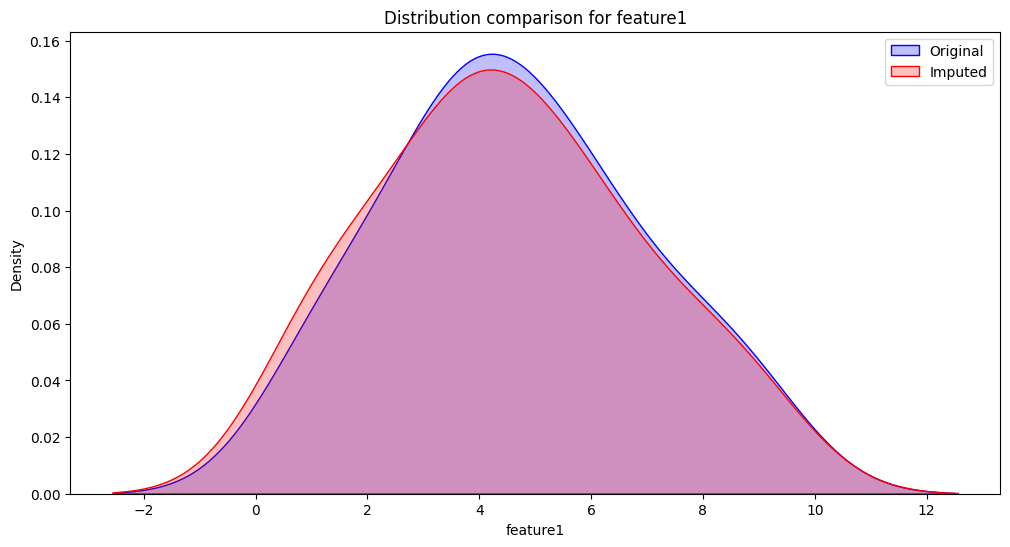

Original feature3 Statistics:
count    28.000000
mean      2.821429
std       1.982396
min       0.000000
25%       1.000000
50%       2.000000
75%       4.250000
max       6.000000
Name: feature3, dtype: float64
Imputed feature3 Statistics:
count    30.000000
mean      2.812840
std       1.961492
min       0.000000
25%       1.000000
50%       2.000000
75%       4.256144
max       6.000000
Name: feature3, dtype: float64
Kolmogorov-Smirnov test for feature3: Statistic=0.02142857142857143, P-value=1.0


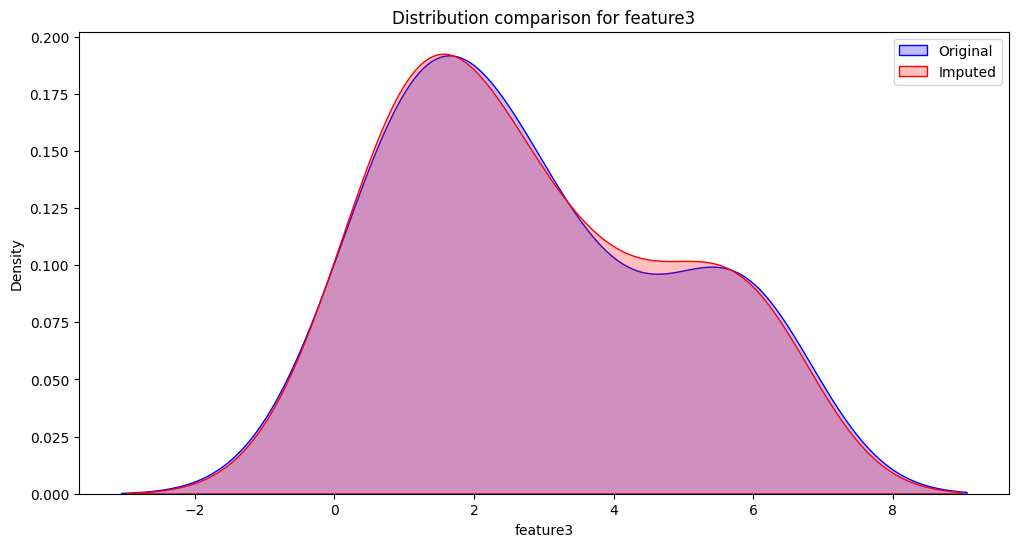

Original feature4 Statistics:
count    29.000000
mean      3.965517
std       2.556263
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max       9.000000
Name: feature4, dtype: float64
Imputed feature4 Statistics:
count    30.000000
mean      3.870205
std       2.565480
min       1.000000
25%       2.000000
50%       3.000000
75%       5.750000
max       9.000000
Name: feature4, dtype: float64
Kolmogorov-Smirnov test for feature4: Statistic=0.027586206896551724, P-value=1.0


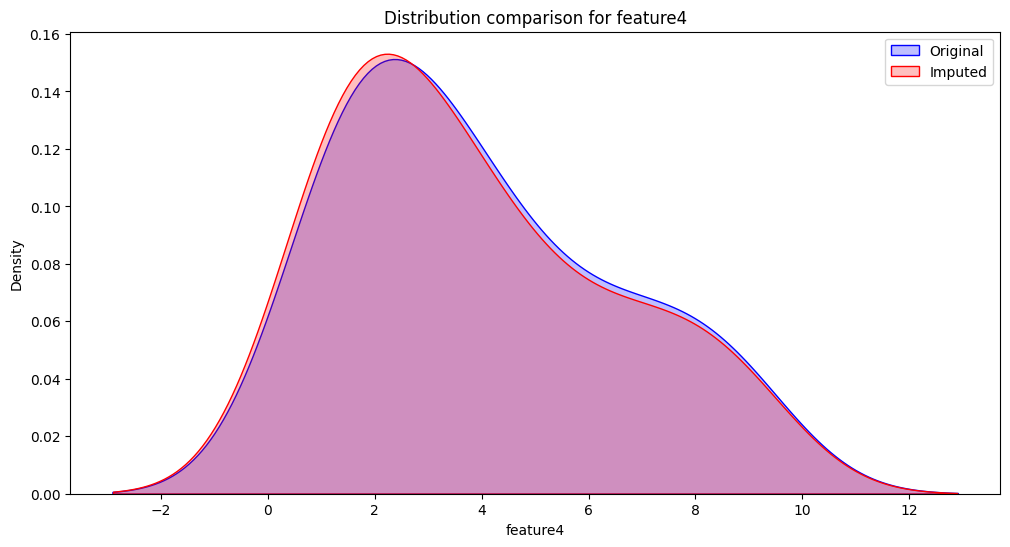

Original feature5 Statistics:
count    28.000000
mean      4.535714
std       2.284929
min       1.000000
25%       2.750000
50%       4.000000
75%       6.000000
max       9.000000
Name: feature5, dtype: float64
Imputed feature5 Statistics:
count    30.000000
mean      4.551883
std       2.227992
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       9.000000
Name: feature5, dtype: float64
Kolmogorov-Smirnov test for feature5: Statistic=0.02142857142857143, P-value=1.0


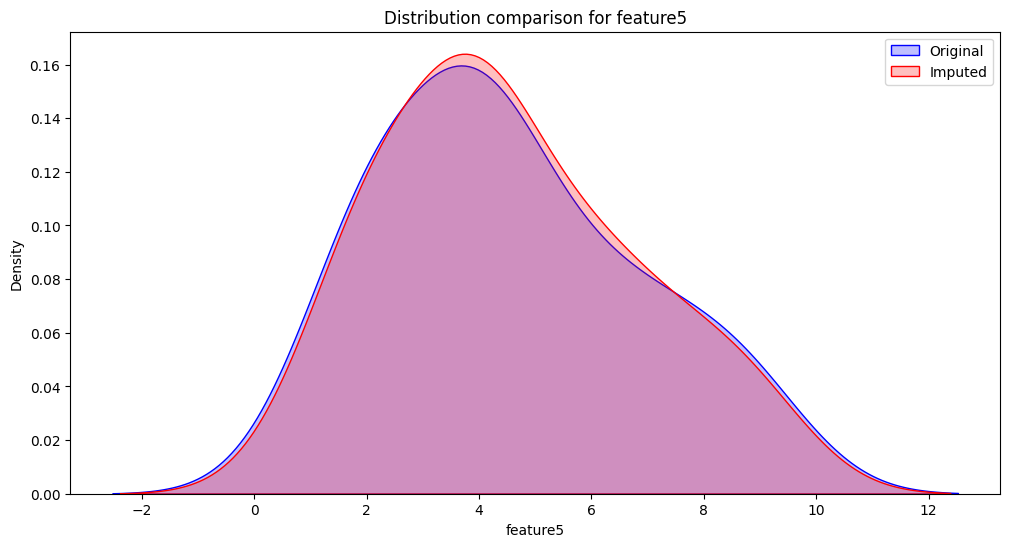

In [23]:
xg_test.check_plausibility(imp_data_xp)

### Compare with T-test and plot

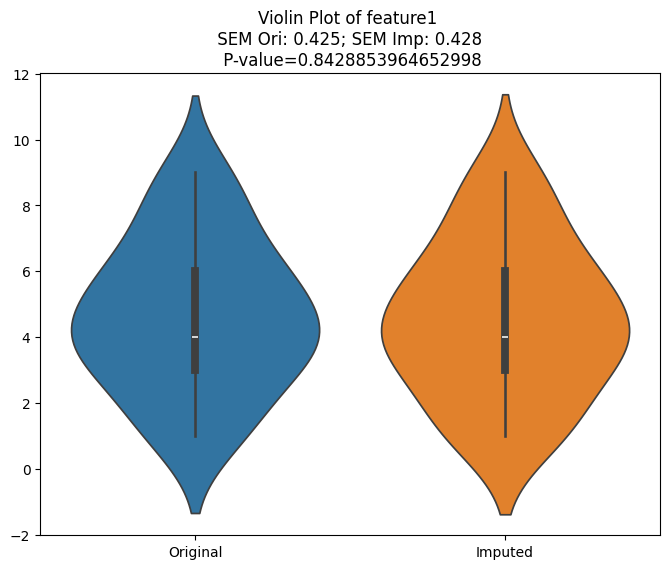

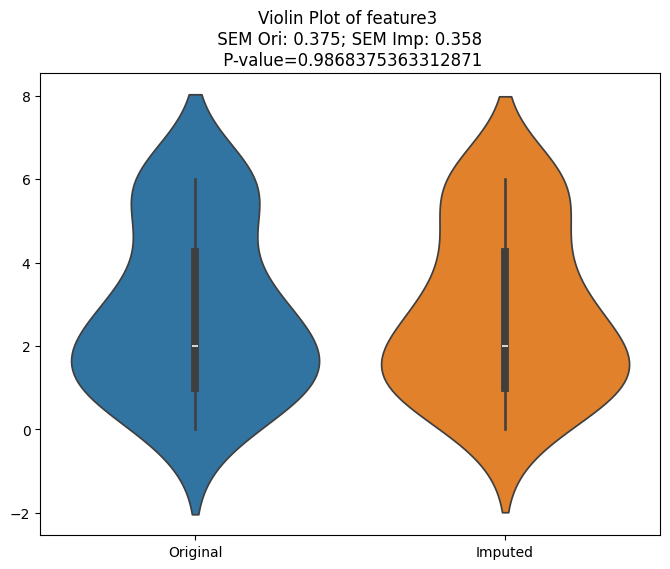

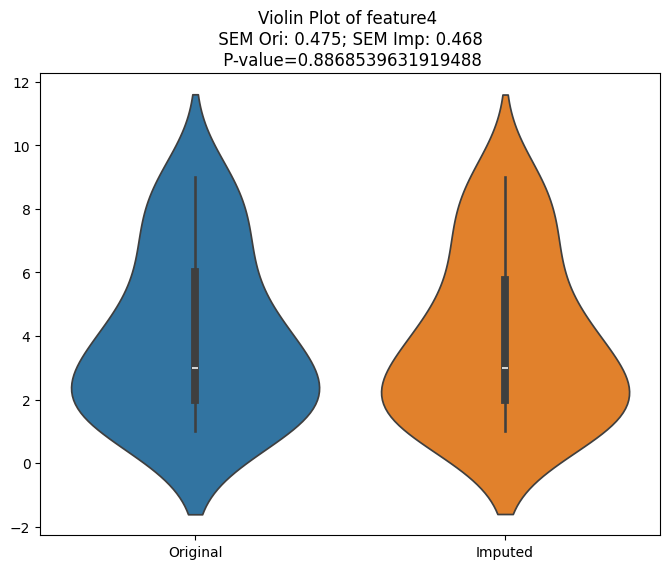

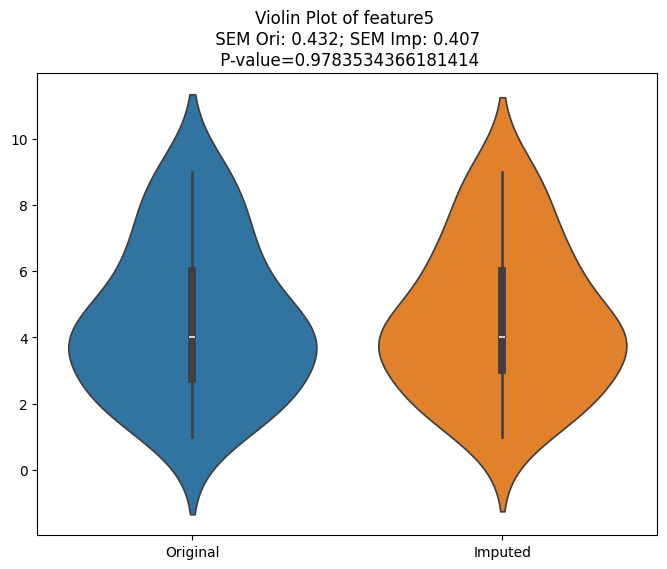

In [24]:
xg_test.compare_with_ttest_and_plot(imp_data_xp)

### Visualize feature combinations plots for each features

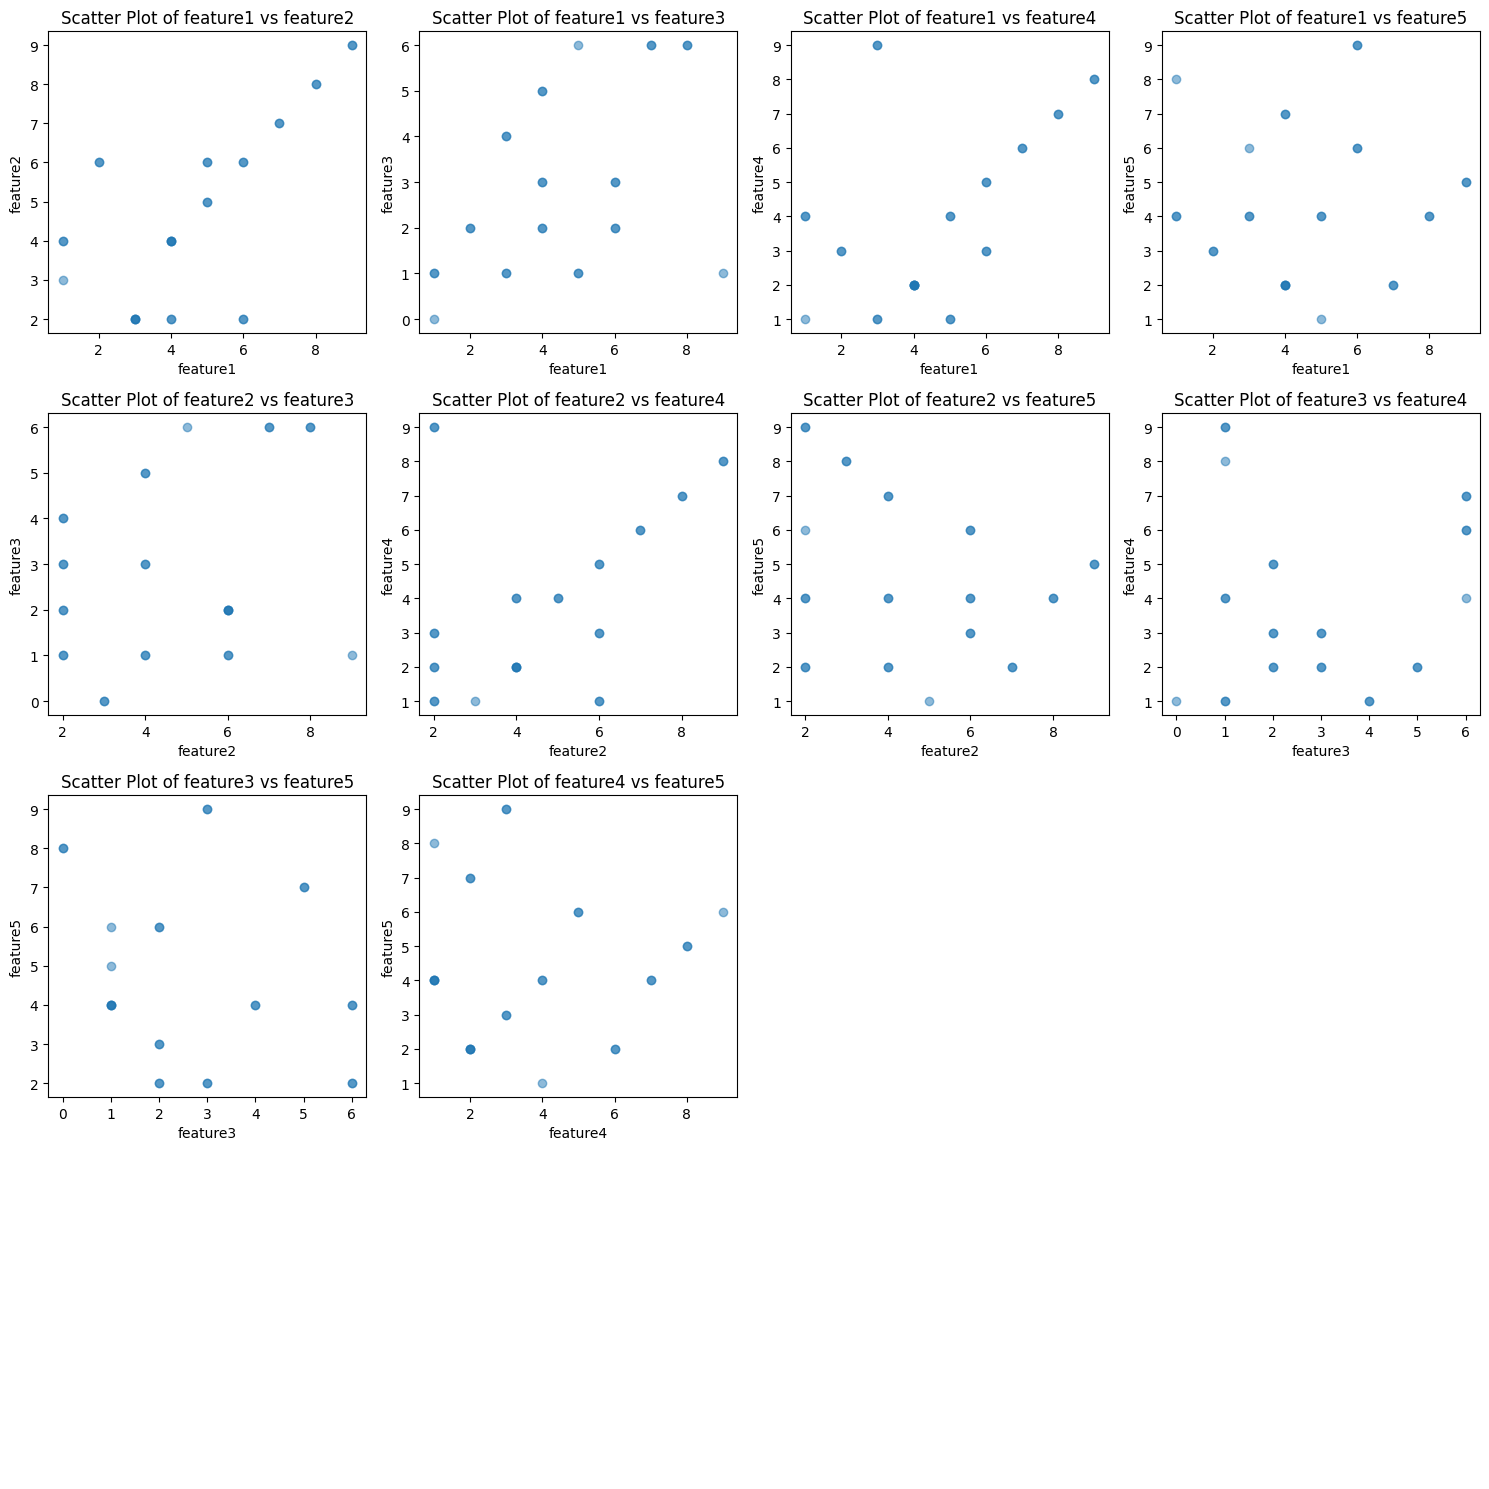

In [25]:
xg_test.feature_combinations()

## Perform a test to check which imputation method fits for your data

### By XeroAnalyzer

In [26]:
xg_test = xa(data)
# MICE imputation is a slow process, if you want to include pass "run_mice=True".
summary = xg_test.compare_imputers(run_mice=False)
print(summary)

Preprocessing data
Computing cNMF, only NaN transformed values will be used, initial values remain the same


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 17.53it/s]

          Method  RMSE-mean  RMSE-median  RMSE-min  RMSE-max    P-mean  \
0           mean   1.707314     1.814061  0.827805  2.920432  0.563357   
1         median   1.605938     1.290994  0.816497  2.828427  0.654962   
2  most_frequent   2.048538     2.160247  1.290994  2.828427  0.439553   
3            KNN   1.323373     1.432946  0.774597  1.700980  0.369397   
4      iterative   1.561694     1.735341  0.986715  1.910460  0.535348   
5  random_forest   1.050748     0.767447  0.498698  1.898991  0.486832   
6       lasso_cv   1.647774     1.711206  1.033122  2.054300  0.526185   
7        xgboost   0.607238     0.337342  0.000914  1.739860  0.425114   
8         xputer   0.811915     0.614315  0.057231  2.035783  0.415192   

   P-median     P-min     P-max  
0  0.750971  0.095921  0.835271  
1  0.824001  0.225403  1.000000  
2  0.225403  0.074180  1.000000  
3  0.333717  0.225403  0.639058  
4  0.530839  0.096059  0.891046  
5  0.466143  0.163282  0.973192  
6  0.499025  0.122757

### By XeroCompare

In [27]:
from XeroGraph import xc
compare_imp = xc(data)
# MICE imputation is a slow process, if you want to include pass "run_mice=True".
summary = compare_imp.compare(run_mice=False)
print(summary) 

Preprocessing data
Computing cNMF, only NaN transformed values will be used, initial values remain the same


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 18.84it/s]

          Method  RMSE-mean  RMSE-median  RMSE-min  RMSE-max    P-mean  \
0           mean   2.013620     1.885862  1.175380  3.313716  0.514736   
1         median   2.153708     2.000000  1.658312  3.316625  0.371147   
2  most_frequent   2.538011     2.500000  1.632993  3.559026  0.213502   
3            KNN   1.698321     1.315295  0.739369  3.348632  0.550454   
4      iterative   1.919018     1.598012  1.386113  2.626179  0.457433   
5  random_forest   1.768126     0.988163  0.598707  3.508513  0.464444   
6       lasso_cv   1.955888     1.968588  1.265478  2.715753  0.454255   
7        xgboost   1.736876     1.034993  0.042150  4.653445  0.422364   
8         xputer   1.771778     0.990298  0.416106  3.402473  0.473691   

   P-median     P-min     P-max  
0  0.534267  0.059646  0.983931  
1  0.141122  0.037750  0.899496  
2  0.183503  0.037386  0.625366  
3  0.397426  0.188497  0.967974  
4  0.473802  0.059100  0.823989  
5  0.555367  0.024689  0.819844  
6  0.500487  0.059646